In [39]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from matplotlib import pyplot as plt
from PIL import Image

In [45]:
test_img = r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\banana.jpg"

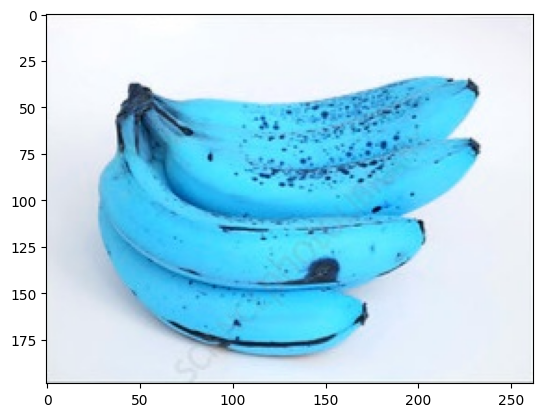

In [46]:
main_img = cv2.imread(test_img)
plt.imshow(main_img)

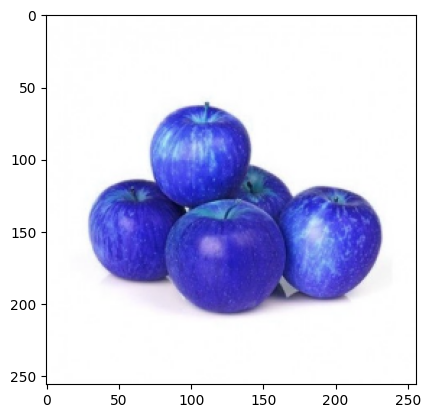

In [50]:
test_img = r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\new_test_images\apple_1.jpg"
main_img = cv2.imread(test_img)
# normalizing image pixels
normalized_image = cv2.normalize(main_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# Resize the image
resized_image = cv2.resize(normalized_image, (256, 256)) 
plt.imshow(resized_image)

# Color based featues

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


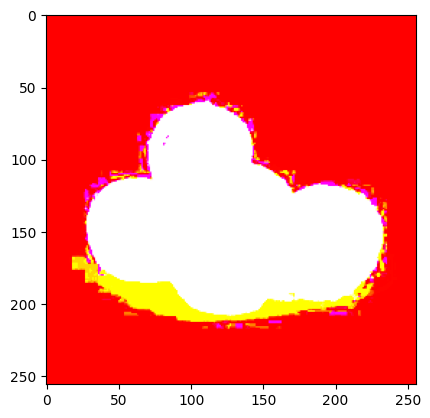

In [49]:
test_img = r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\new_test_images\apple_1.jpg"
main_img = cv2.imread(test_img)
# normalizing image pixels
normalized_image = cv2.normalize(main_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# Resize the image
resized_image = cv2.resize(normalized_image, (256, 256))
# CHANGING COLOR SPACE OF THE IMAGE 
img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2LAB)
plt.imshow(img)

In [51]:
import cv2
import numpy as np
from scipy.stats import skew, kurtosis

# Calculate color histograms
def calculate_color_histogram(image, bins):
    histogram = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    histogram = cv2.normalize(histogram, histogram).flatten()
    return histogram

# Calculate color moments
def calculate_color_moments(image):
    mean, std_dev = cv2.meanStdDev(image)
    mean = mean.flatten()
    std_dev = std_dev.flatten()
    return np.concatenate((mean, std_dev), axis=0)

# Calculate statistical moments
def calculate_statistical_moments(image):
    statistical_moments = []
    for channel in range(image.shape[2]):
        statistical_moments.append(np.mean(image[:,:,channel]))
        statistical_moments.append(np.var(image[:,:,channel]))
        statistical_moments.append(skew(image[:,:,channel].flatten()))
        statistical_moments.append(kurtosis(image[:,:,channel].flatten()))
    return statistical_moments

# Calculate color contrast
def calculate_color_contrast(image):
    contrast = np.max(image) - np.min(image)
    return contrast

# Split the LAB image into channels
l_channel, a_channel, b_channel = cv2.split(img)

# Define the number of bins for the histogram
bins = [8, 8, 8]  # Number of bins for each channel

# Extract color-based features
histogram = calculate_color_histogram(img, bins)
color_moments = calculate_color_moments(img)

# Calculate statistical moments
statistical_moments = calculate_statistical_moments(img)

# Calculate color contrast
color_contrast = calculate_color_contrast(img)

# Print the color features
print("Color Moments:", color_moments)
print("Statistical Moments:", statistical_moments)
print("Color Contrast:", color_contrast)  
print("Color Moments:", color_moments.shape)
print("Statistical Moments:", len(statistical_moments))

Color Moments: [85.31589452 12.74337816  7.76518869 23.73363763 21.27639292 13.37560007]
Statistical Moments: [85.315895, 563.2856, -1.1904144922744984, -0.29602297182591064, 12.743378, 452.68484, 1.251620038594422, -0.20229807790204113, 7.7651887, 178.90668, 1.3013288478862495, 0.015255635319469718]
Color Contrast: 105.53125
Color Moments: (6,)
Statistical Moments: 12


In [52]:
#Color features
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

red_mean = np.mean(red_channel)
green_mean = np.mean(green_channel)
blue_mean = np.mean(blue_channel)

red_std = np.std(red_channel)
green_std = np.std(green_channel)
blue_std = np.std(blue_channel)

# Shape based features

# better on single banana image

C:\Users\RIYA DHAWAS\AppData\Local\Temp\ipykernel_20752\263661270.py:31: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(1 - (ma / MA) ** 2)


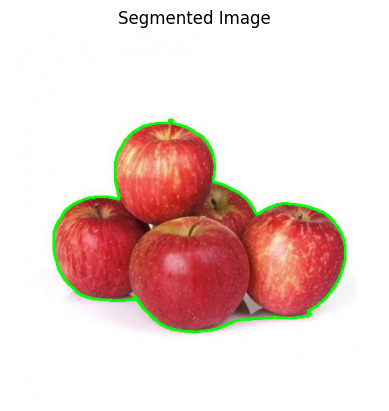

In [53]:
import cv2
import numpy as np

# Read the image
image = cv2.imread(r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\new_test_images\apple_1.jpg") 


# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and extract shape-based features
for contour in contours:
    # Compute contour properties
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    # Calculate bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate aspect ratio
    aspect_ratio = float(w) / h
    
    # Calculate eccentricity if enough points are available
    if len(contour) >= 5:
        _, (MA, ma), _ = cv2.fitEllipse(contour)
        eccentricity = np.sqrt(1 - (ma / MA) ** 2)
    else:
        eccentricity = 0

    # Calculate convex hull
    hull = cv2.convexHull(contour)

    # Calculate solidity if hull area is non-zero
    hull_area = cv2.contourArea(hull)
    if hull_area > 0:
        solidity = area / hull_area
    else:
        solidity = 0

    if perimeter > 0:
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        compactness = area / (perimeter ** 2)
        roundness = (4 * area) / (np.pi * (perimeter ** 2))
    else:
        circularity = 0
        compactness = 0
        roundness = 0 

    # Draw the contour on the original image (optional)
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display the segmented image with contours
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()


In [13]:
!mkdir build
!cd build
!cmake ..

A subdirectory or file build already exists.
'cmake' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
!sudo apt install build-essential cmake libgtk2.0-dev pkg-config

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
!pip install opencv-python

# performs better on bunch image with shadow removal

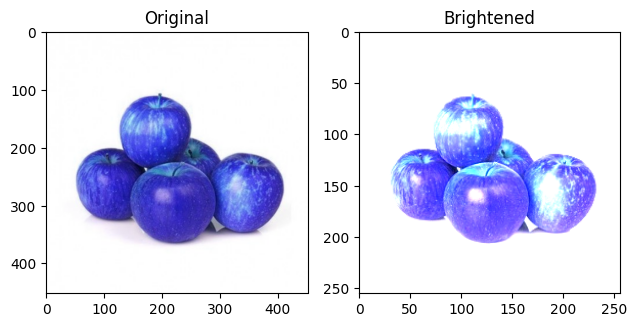

C:\Users\RIYA DHAWAS\AppData\Local\Temp\ipykernel_20752\2266725161.py:72: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(1 - (ma / MA) ** 2)


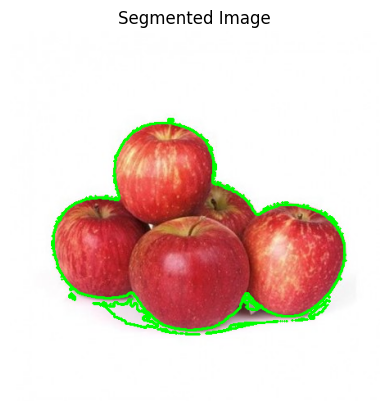

In [54]:
import cv2
import numpy as np 
from PIL import Image

# Read the image
image = cv2.imread(r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\new_test_images\apple_1.jpg") 
# image=cv2.cvtColor(image,cv2.COLOR_BGR2LAB)

#resize and normalize
# normalizing image pixels
normalized_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# Resize the image
resized_image = cv2.resize(normalized_image, (256, 256)) 

# Normalize the pixel values to the range [0, 255]
normalized_image = cv2.normalize(resized_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Convert the normalized array to a PIL Image
pil_image = Image.fromarray(normalized_image)

brightness_factor = 2  # Adjust this value to change the brightness
enhanced_image = pil_image.point(lambda x: x * brightness_factor)  

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original") 

plt.subplot(1,2,2) 
plt.imshow(enhanced_image) 
plt.title("Brightened") 

plt.tight_layout()
plt.show()

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Separate the LAB channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Shadow removal
shadow_mask = a_channel > 135  # Example shadow detection based on 'a' channel intensity
l_channel[shadow_mask] = 245  # Replace shadowed pixels with a constant value

# Convert the image back to BGR color space
processed_image = cv2.cvtColor(cv2.merge([l_channel, a_channel, b_channel]), cv2.COLOR_LAB2BGR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and extract shape-based features
for contour in contours:
    # Compute contour properties
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    # Calculate bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate aspect ratio
    aspect_ratio = float(w) / h
    
    # Calculate eccentricity if enough points are available
    if len(contour) >= 5:
        _, (MA, ma), _ = cv2.fitEllipse(contour)
        if MA != 0:
            eccentricity = np.sqrt(1 - (ma / MA) ** 2)
        else:
            eccentricity = 0
    else:
        eccentricity = 0

    # Calculate convex hull
    hull = cv2.convexHull(contour)

    # Calculate solidity if hull area is non-zero
    hull_area = cv2.contourArea(hull)
    if hull_area > 0:
        solidity = area / hull_area
    else:
        solidity = 0

    if perimeter > 0:
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        compactness = area / (perimeter ** 2)
        roundness = (4 * area) / (np.pi * (perimeter ** 2))
    else:
        circularity = 0
        compactness = 0
        roundness = 0 

    # Draw the contour on the original image (optional)
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display the segmented image with contours
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()



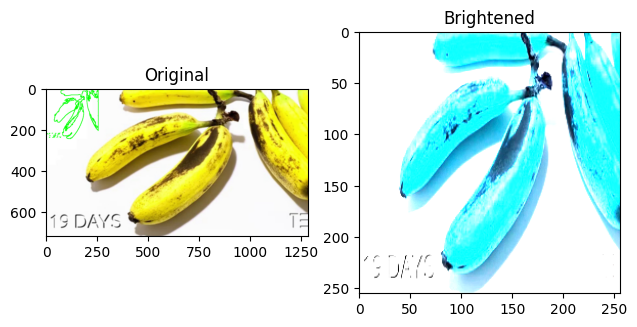

In [18]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('frame2300.jpg')

# Resize the image
resized_image = cv2.resize(image, (256, 256))

# Normalize the pixel values to the range [0, 1]
normalized_image = resized_image / 255.0

# Increase brightness
brightness_factor = 2
brightened_image = normalized_image * brightness_factor
brightened_image = np.clip(brightened_image, 0, 1)

# Convert the brightened image to PIL Image
pil_image = Image.fromarray((brightened_image * 255).astype(np.uint8))

# Convert the image to LAB color space
lab_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2LAB)

# Separate the LAB channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Shadow removal
shadow_mask = a_channel > 135  # Example shadow detection based on 'a' channel intensity
l_channel[shadow_mask] = 245  # Replace shadowed pixels with a constant value

# Convert the image back to BGR color space
processed_image = cv2.cvtColor(cv2.merge([l_channel, a_channel, b_channel]), cv2.COLOR_LAB2BGR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Display the original and enhanced image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(pil_image)
plt.title("Brightened")

plt.tight_layout()
plt.show()


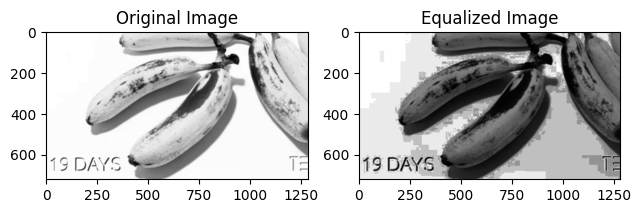

In [19]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('frame2300.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.tight_layout()
plt.show()


C:\Users\RIYA DHAWAS\AppData\Local\Temp\ipykernel_20752\305995238.py:44: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(1 - (ma / MA) ** 2)


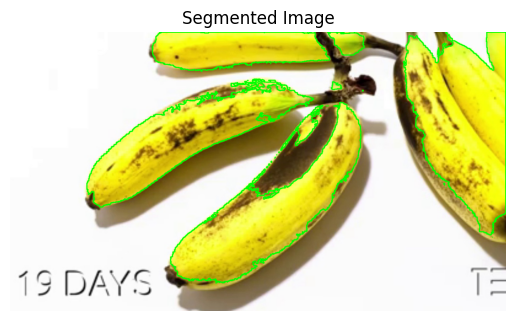

In [28]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('frame2300.jpg')

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Separate the LAB channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Shadow removal
shadow_mask = a_channel > 115  # Example shadow detection based on 'a' channel intensity
l_channel[shadow_mask] = 250  # Replace shadowed pixels with a constant value

# Convert the image back to BGR color space
processed_image = cv2.cvtColor(cv2.merge([l_channel, a_channel, b_channel]), cv2.COLOR_LAB2BGR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and extract shape-based features
for contour in contours:
    # Compute contour properties
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    # Calculate bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate aspect ratio
    aspect_ratio = float(w) / h
    
    # Calculate eccentricity if enough points are available
    if len(contour) >= 5:
        _, (MA, ma), _ = cv2.fitEllipse(contour)
        if MA != 0:
            eccentricity = np.sqrt(1 - (ma / MA) ** 2)
        else:
            eccentricity = 0
    else:
        eccentricity = 0

    # Calculate convex hull
    hull = cv2.convexHull(contour)

    # Calculate solidity if hull area is non-zero
    hull_area = cv2.contourArea(hull)
    if hull_area > 0:
        solidity = area / hull_area
    else:
        solidity = 0

    if perimeter > 0:
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        compactness = area / (perimeter ** 2)
        roundness = (4 * area) / (np.pi * (perimeter ** 2))
    else:
        circularity = 0
        compactness = 0
        roundness = 0 

    # Draw the contour on the original image (optional)
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display the segmented image with contours
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()



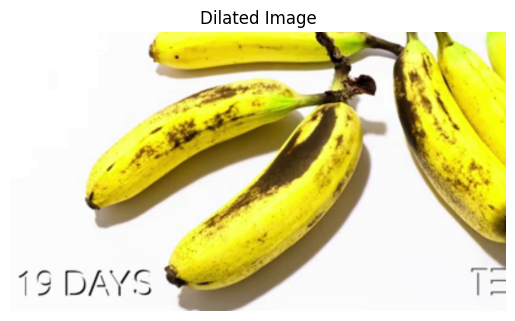

In [27]:

# reading image using cv2 
image = cv2.imread('frame2300.jpg') 
grayed=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh , binary = cv2.threshold(grayed,150,255,cv2.THRESH_BINARY) 

kernel=np.ones((3,3),np.uint8)

eroded=cv2.erode(binary,kernel,iterations=2)
dilated=cv2.erode(eroded,kernel,iterations=5) 

# Display the segmented image with contours
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Dilated Image")
plt.axis('off')
plt.show()


C:\Users\RIYA DHAWAS\AppData\Local\Temp\ipykernel_20752\1262350190.py:44: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(1 - (ma / MA) ** 2)


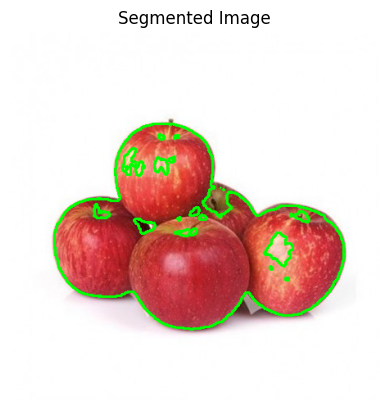

In [55]:
import cv2
import numpy as np

# Read the image
image = cv2.imread(r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\new_test_images\apple_1.jpg")

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Separate the LAB channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Shadow removal
shadow_mask = a_channel > 115  # Example shadow detection based on 'a' channel intensity
l_channel[shadow_mask] = 250  # Replace shadowed pixels with a constant value

# Convert the image back to BGR color space
processed_image = cv2.cvtColor(cv2.merge([l_channel, a_channel, b_channel]), cv2.COLOR_LAB2BGR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and extract shape-based features
for contour in contours:
    # Compute contour properties
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    # Calculate bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate aspect ratio
    aspect_ratio = float(w) / h
    
    # Calculate eccentricity if enough points are available
    if len(contour) >= 5:
        _, (MA, ma), _ = cv2.fitEllipse(contour)
        if MA != 0:
            eccentricity = np.sqrt(1 - (ma / MA) ** 2)
        else:
            eccentricity = 0
    else:
        eccentricity = 0

    # Calculate convex hull
    hull = cv2.convexHull(contour)

    # Calculate solidity if hull area is non-zero
    hull_area = cv2.contourArea(hull)
    if hull_area > 0:
        solidity = area / hull_area
    else:
        solidity = 0

    if perimeter > 0:
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        compactness = area / (perimeter ** 2)
        roundness = (4 * area) / (np.pi * (perimeter ** 2))
    else:
        circularity = 0
        compactness = 0
        roundness = 0 

    # Draw the contour on the original image (optional)
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display the segmented image with contours (optional)
# Display the segmented image with contours
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()


C:\Users\RIYA DHAWAS\AppData\Local\Temp\ipykernel_20752\2948969636.py:31: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(1 - (ma / MA) ** 2)


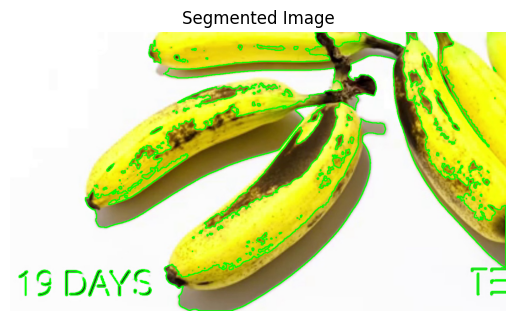

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('frame2300.jpg') 

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and extract shape-based features
for contour in contours:
    # Compute contour properties
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    # Calculate bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate aspect ratio
    aspect_ratio = float(w) / h
    
    # Calculate eccentricity if enough points are available
    if len(contour) >= 5:
        _, (MA, ma), _ = cv2.fitEllipse(contour)
        eccentricity = np.sqrt(1 - (ma / MA) ** 2)
    else:
        eccentricity = 0

    # Calculate convex hull
    hull = cv2.convexHull(contour)

    # Calculate solidity if hull area is non-zero
    hull_area = cv2.contourArea(hull)
    if hull_area > 0:
        solidity = area / hull_area
    else:
        solidity = 0

    if perimeter > 0:
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        compactness = area / (perimeter ** 2)
        roundness = (4 * area) / (np.pi * (perimeter ** 2))
    else:
        circularity = 0
        compactness = 0
        roundness = 0 

    # Draw the contour on the original image (optional)
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display the segmented image with contours
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()


# No patches 

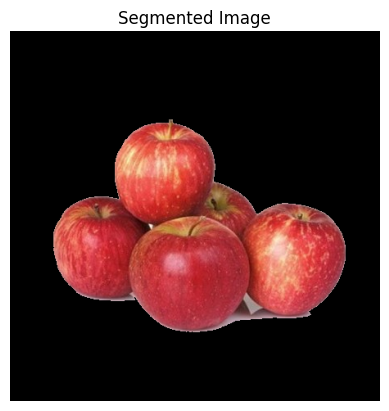

In [56]:
import cv2
import numpy as np

# Read the image
image = cv2.imread(r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\new_test_images\apple_1.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask to store the fruit pixels
fruit_mask = np.zeros_like(binary_image)

# Iterate through each contour and fill the fruit pixels in the mask
for contour in contours:
    cv2.drawContours(fruit_mask, [contour], -1, 255, -1)

# Apply the mask to the original image
fruit_pixels = cv2.bitwise_and(image, image, mask=fruit_mask)

# Display the fruit pixels
# Display the segmented image with contours
plt.imshow(cv2.cvtColor(fruit_pixels, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()

In [59]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Read the image
image = cv2.imread(r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\new_test_images\apple_1.jpg")

# Preprocess the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract color features from the image
color_features = image.reshape(-1, 3)

# Extract texture features from the image using gray-level co-occurrence matrix (GLCM)
glcm = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
glcm_features = np.reshape(glcm, (-1, 1))

# Combine color and texture features
features = np.hstack((color_features, glcm_features))

# Create labels for training (1 for fruit pixels, 0 for background pixels)
labels = np.zeros((image.shape[0], image.shape[1]))
labels[fruit_pixels] = 1

# Train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(features, labels.ravel())

# Predict the labels for the entire image
predicted_labels = classifier.predict(features)

# Reshape the predicted labels back to the image shape
segmented_image = predicted_labels.reshape(image.shape[0], image.shape[1])

# Display the segmented image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()


error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xb9d9ffe2::Set<3,4,-1>,struct cv::impl::A0xb9d9ffe2::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


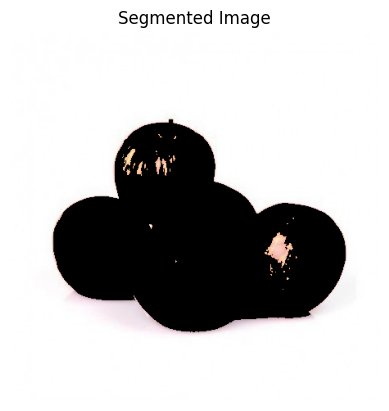

In [60]:
import cv2
import numpy as np

# Read the image
image = cv2.imread(r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\new_test_images\apple_1.jpg")

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Convert the pixel values to floating point
pixels = np.float32(pixels)

# Define the criteria for K-means (change the values as needed)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set the number of clusters (change the value as needed)
k = 2

# Perform K-means clustering
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshape the labels to match the original image shape
segmented = labels.reshape(image.shape[:2])

# Create a mask for the banana region
mask = np.uint8(segmented == 1) * 255

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Display the segmented image and the mask
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()

# ML segmentation algorithms

In [19]:
# import cv2
# import numpy as np
# import torch
# from torchvision.models.detection import fasterrcnn_resnet50_fpn

# # Step 1: Detect Banana Bunches using Faster R-CNN

# # Load pre-trained Faster R-CNN model
# model = fasterrcnn_resnet50_fpn(pretrained=True)
# model.eval()

# # Read the image
# image = cv2.imread('frame322.jpg')
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Convert the image to a tensor
# image_tensor = torch.from_numpy(image_rgb.transpose((2, 0, 1))).float()

# # Run the image through the model
# output = model([image_tensor])

# # Retrieve the predicted bounding boxes
# boxes = output[0]['boxes'].detach().numpy()

# # Step 2: Shadow Removal and Enhancing Banana Regions

# # Convert the image to the LAB color space
# image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# # Split the LAB image into channels
# l_channel, a_channel, b_channel = cv2.split(image_lab)

# # Apply adaptive thresholding to the L channel to obtain a binary mask of shadows
# _, shadow_mask = cv2.threshold(l_channel, 50, 255, cv2.THRESH_BINARY)

# # Invert the shadow mask
# shadow_mask_inv = cv2.bitwise_not(shadow_mask)

# # Apply the shadow mask to the L channel to reduce shadow effects
# l_channel_no_shadow = cv2.bitwise_and(l_channel, shadow_mask_inv)

# # Combine the modified L channel with the original A and B channels
# image_lab_no_shadow = cv2.merge([l_channel_no_shadow, a_channel, b_channel])

# # Convert the modified LAB image back to the BGR color space
# image_no_shadow = cv2.cvtColor(image_lab_no_shadow, cv2.COLOR_LAB2BGR)

# # Step 3: Segment Banana Bunches using K-means Clustering

# # Convert the image without shadow to the LAB color space
# image_no_shadow_lab = cv2.cvtColor(image_no_shadow, cv2.COLOR_BGR2LAB)

# # Extract the L channel
# l_channel_no_shadow = cv2.split(image_no_shadow_lab)[0]

# # Reshape the L channel to a 2D array of pixels
# pixels = l_channel_no_shadow.reshape(-1, 1)

# # Convert the pixel values to floating point
# pixels = np.float32(pixels)

# # Perform K-means clustering
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# k = 2
# _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# # Reshape the labels to match the original image shape
# segmented = labels.reshape(image.shape[:2])

# # Create a mask for the banana region
# mask = np.uint8(segmented == 1) * 255

# # Apply the mask to the original image
# segmented_image = cv2.bitwise_and(image, image, mask=mask)

# # Step 4: Extract Shape-based Features

# # Find contours in the binary mask
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Iterate through each contour and extract shape-based features
# for contour in contours:
#     # Compute contour properties
#     area = cv2.contourArea(contour)
#     perimeter = cv2.arcLength(contour, True)
#     # Calculate bounding rectangle
#     x, y, w, h = cv2.boundingRect(contour)

#     # Calculate aspect ratio
#     aspect_ratio = float(w) / h

#     # Calculate eccentricity if enough points are available
#     if len(contour) >= 5:
#         _, (MA, ma), _ = cv2.fitEllipse(contour)
#         if MA != 0:
#             eccentricity = np.sqrt(max(1 - (ma / MA) ** 2, 0))
#         else:
#             eccentricity = 0
#     else:
#         eccentricity = 0

#     # Calculate convex hull
#     hull = cv2.convexHull(contour)

#     # Calculate solidity if hull area is non-zero
#     hull_area = cv2.contourArea(hull)
#     if hull_area > 0:
#         solidity = area / hull_area
#     else:
#         solidity = 0

#     # Print the shape features
#     print("Area:", area)
#     print("Perimeter:", perimeter)
#     print("Aspect Ratio:", aspect_ratio)
#     print("Eccentricity:", eccentricity)
#     print("Solidity:", solidity)

#     # Display the segmented image
#     cv2.imshow("Segmented Image", segmented_image)
#     cv2.waitKey(0)

# # Close all windows
# cv2.destroyAllWindows()


In [20]:
import cv2
import numpy as np
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Step 1: Detect Banana Bunches using Faster R-CNN

# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Read the image
image = cv2.imread('frame2300.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to a tensor
image_tensor = torch.from_numpy(image_rgb.transpose((2, 0, 1))).float()

# Run the image through the model
output = model([image_tensor])

# Retrieve the predicted bounding boxes
boxes = output[0]['boxes'].detach().numpy()

# Step 2: Shadow Removal and Enhancing Banana Regions

# Convert the image to the LAB color space
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into channels
l_channel, a_channel, b_channel = cv2.split(image_lab)

# Apply adaptive thresholding to the L channel to obtain a binary mask of shadows
_, shadow_mask = cv2.threshold(l_channel, 50, 255, cv2.THRESH_BINARY)

# Invert the shadow mask
shadow_mask_inv = cv2.bitwise_not(shadow_mask)

# Apply the shadow mask to the L channel to reduce shadow effects
l_channel_no_shadow = cv2.bitwise_and(l_channel, shadow_mask_inv)

# Combine the modified L channel with the original A and B channels
image_lab_no_shadow = cv2.merge([l_channel_no_shadow, a_channel, b_channel])

# Convert the modified LAB image back to the BGR color space
image_no_shadow = cv2.cvtColor(image_lab_no_shadow, cv2.COLOR_LAB2BGR)

# Step 3: Segment Banana Bunches using K-means Clustering

# Convert the image without shadow to the LAB color space
image_no_shadow_lab = cv2.cvtColor(image_no_shadow, cv2.COLOR_BGR2LAB)

# Extract the L channel
l_channel_no_shadow = cv2.split(image_no_shadow_lab)[0]

# Reshape the L channel to a 2D array of pixels
pixels = l_channel_no_shadow.reshape(-1, 1)

# Convert the pixel values to floating point
pixels = np.float32(pixels)

# Perform K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshape the labels to match the original image shape
segmented = labels.reshape(image.shape[:2])

# Create a mask for the banana region
mask = np.uint8(segmented == 1) * 255

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Step 4: Extract Shape-based Features

# Find contours in the binary mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and extract shape-based features
for contour in contours:
    # Compute contour properties
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    # Calculate bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate aspect ratio
    aspect_ratio = float(w) / h

    # Calculate eccentricity if enough points are available
    if len(contour) >= 5:
        _, (MA, ma), _ = cv2.fitEllipse(contour)
        if MA != 0:
            eccentricity = np.sqrt(max(1 - (ma / MA) ** 2, 0))
        else:
            eccentricity = 0
    else:
        eccentricity = 0

    # Calculate convex hull
    hull = cv2.convexHull(contour)

    # Calculate solidity if hull area is non-zero
    hull_area = cv2.contourArea(hull)
    if hull_area > 0:
        solidity = area / hull_area
    else:
        solidity = 0

# Print the shape features
print("Area:", area)
print("Perimeter:", perimeter)
print("Aspect Ratio:", aspect_ratio)
print("Eccentricity:", eccentricity)
print("Solidity:", solidity)

# Display the segmented image
cv2.imshow("Segmented Image", segmented_image)

# Wait for key press and check for 'q' key
key = cv2.waitKey(1) & 0xFF
# if key == ord('q'):
#     break

# Close all windows
cv2.destroyAllWindows()


C:\Users\RIYA DHAWAS\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RIYA DHAWAS\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Area: 408978.0
Perimeter: 8894.043505072594
Aspect Ratio: 1.6116071428571428
Eccentricity: 0.0
Solidity: 0.6548462429578226


In [21]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops

def extract_texture_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the GLCM
    distances = [1]  # Distance between pixels (you can experiment with different values)
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles for texture measurements
    glcm = graycomatrix(gray, distances, angles, levels=256, symmetric=True, normed=True)

    # Extract texture features
    contrast = graycoprops(glcm, prop='contrast').ravel()
    dissimilarity = graycoprops(glcm, prop='dissimilarity').ravel()
    homogeneity = graycoprops(glcm, prop='homogeneity').ravel()
    energy = graycoprops(glcm, prop='energy').ravel()
    correlation = graycoprops(glcm, prop='correlation').ravel()

    # Concatenate the features into a single vector
    features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation])

    return features

# Example usage
image_path = 'frame322.jpg'
image = cv2.imread(image_path)
texture_features = extract_texture_features(image)
print(texture_features)
print(len(texture_features))


[17.06947376 27.74865621 17.09689456 37.23351323  1.0179361   1.49318889
  1.30428981  1.84351692  0.78195791  0.71833269  0.74036934  0.69960868
  0.09288469  0.08743836  0.09082299  0.08704042  0.99719838  0.99545047
  0.99719533  0.99389538]
20


In [22]:
# ds_path = r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\archive (1)"
# img_files = os.listdir(ds_path)
# i=1
# def create_dataset():
#     names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
#              'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
#              'contrast','correlation','inverse_difference_moments','entropy','filename'
#             ]
#     df = pd.DataFrame([], columns=names)
#     for file in img_files:
#         imgpath = ds_path + "\\" + file
#         main_img = cv2.imread(imgpath)
        
#         #Preprocessing
#         img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
#         gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#         blur = cv2.GaussianBlur(gs, (25,25),0)
#         ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         kernel = np.ones((50,50),np.uint8)
#         closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
        

In [23]:
import csv

In [24]:
csv_file="features.csv"

In [33]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras 



# Set the main folder path
main_folder = r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\archive (1)" 

def preprocess_image(image):
#     image = cv2.imread(image_path)
    # normalizing image pixels
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    # Resize the image
    image = cv2.resize(image, (256, 256)) 
    return image
    

# Set the feature extraction function
from skimage.feature import graycomatrix, graycoprops
def extract_features(image): 
    l=[]
    # Load pre-trained Faster R-CNN model
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to a tensor
    image_tensor = torch.from_numpy(image_rgb.transpose((2, 0, 1))).float()

    # Run the image through the model
    output = model([image_tensor])

    # Retrieve the predicted bounding boxes
    boxes = output[0]['boxes'].detach().numpy()

    # Step 2: Shadow Removal and Enhancing Banana Regions

    # Convert the image to the LAB color space
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into channels
    l_channel, a_channel, b_channel = cv2.split(image_lab)

    # Apply adaptive thresholding to the L channel to obtain a binary mask of shadows
    _, shadow_mask = cv2.threshold(l_channel, 50, 255, cv2.THRESH_BINARY)

    # Invert the shadow mask
    shadow_mask_inv = cv2.bitwise_not(shadow_mask)

    # Apply the shadow mask to the L channel to reduce shadow effects
    l_channel_no_shadow = cv2.bitwise_and(l_channel, shadow_mask_inv)

    # Combine the modified L channel with the original A and B channels
    image_lab_no_shadow = cv2.merge([l_channel_no_shadow, a_channel, b_channel])

    # Convert the modified LAB image back to the BGR color space
    image_no_shadow = cv2.cvtColor(image_lab_no_shadow, cv2.COLOR_LAB2BGR)

    # Step 3: Segment Banana Bunches using K-means Clustering

    # Convert the image without shadow to the LAB color space
    image_no_shadow_lab = cv2.cvtColor(image_no_shadow, cv2.COLOR_BGR2LAB)

    # Extract the L channel
    l_channel_no_shadow = cv2.split(image_no_shadow_lab)[0]

    # Reshape the L channel to a 2D array of pixels
    pixels = l_channel_no_shadow.reshape(-1, 1)

    # Convert the pixel values to floating point
    pixels = np.float32(pixels)

    # Perform K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    k = 2
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Reshape the labels to match the original image shape
    segmented = labels.reshape(image.shape[:2])

    # Create a mask for the banana region
    mask = np.uint8(segmented == 1) * 255

    # Apply the mask to the original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    # Step 4: Extract Shape-based Features

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through each contour and extract shape-based features
    for contour in contours:
        # Compute contour properties
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        # Calculate bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate aspect ratio
        aspect_ratio = float(w) / h

        # Calculate convex hull
        hull = cv2.convexHull(contour)

        # Calculate solidity if hull area is non-zero
        hull_area = cv2.contourArea(hull)
        if hull_area > 0:
            solidity = area / hull_area
        else:
            solidity = 0  
#     print("Area:", area)
#     print("Perimeter:", perimeter)
#     print("Aspect Ratio:", aspect_ratio)
#     print("Solidity:", solidity)

    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_uint8 = gray.astype(np.uint8)  # Convert to unsigned integer type
    
    # Compute the GLCM
    distances = [1]  # Distance between pixels (you can experiment with different values)
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles for texture measurements
    glcm = graycomatrix(gray_uint8, distances, angles, levels=256, symmetric=True, normed=True)
    
    # Extract texture features
    contrast = graycoprops(glcm, prop='contrast').ravel()
    dissimilarity = graycoprops(glcm, prop='dissimilarity').ravel()
    homogeneity = graycoprops(glcm, prop='homogeneity').ravel()
    energy = graycoprops(glcm, prop='energy').ravel()
    correlation = graycoprops(glcm, prop='correlation').ravel() 
    
#     print("contrast",contrast)
#     print("dissimilarity",dissimilarity)
#     print("homogeneity",homogeneity)
#     print("energy",energy)
#     print("correlation",correlation)
    
    #color based features
    # Calculate color contrast
    color_contrast = np.max(image) - np.min(image)
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)
     
#     print("red_mean ",red_mean )
#     print("green_mean",green_mean)
#     print("blue_mean",blue_mean)
#     print("red_std",red_std)
#     print("green_std",green_std)
#     print("blue_std",blue_std)
#     print("color_contrast",color_contrast)

#     l.append(area)
#     l.append(perimeter)
#     l.append(aspect_ratio)
#     l.append(solidity)
#     l.append(contrast)
#     l.append(dissimilarity)
#     l.append(homogeneity)
#     l.append(energy)
#     l.append(correlation)
#     l.append(red_mean)
#     l.append(green_mean)
#     l.append(blue_mean)
#     l.append(red_std)
#     l.append(green_std)
#     l.append(blue_std)
#     l.append(color_contrast)
    x = pd.Series()
    x['Area'] = area
    x['Perimeter'] = perimeter
    x['Aspect Ratio'] = aspect_ratio
    x['Solidity'] = solidity
    x['Contrast'] = contrast
    x['Dissimilarity'] = dissimilarity
    x['Homogeneity'] = homogeneity
    x['Energy'] = energy
    x['Correlation'] = correlation
    x['Red Mean'] = red_mean
    x['Blue Mean'] = blue_mean
    x['Green Mean'] = green_mean
    x['Red Std'] = red_std
    x['Green Std'] = green_std
    x['Blue Std'] = blue_std
    x['Color Contrast'] = color_contrast
    return x
#     return area,perimeter,aspect_ratio,solidity,contrast,dissimilarity,homogeneity,energy,correlation,red_mean,green_mean,blue_mean,red_std,blue_std,green_std,color_contrast


    # Implement your feature extraction algorithm here
    # This function should take an image as input and return the extracted features

# Lists to store the extracted features and corresponding labels
# features = []
# labels = []

# # Iterate through each folder (class) in the main folder
# for class_folder in os.listdir(main_folder):
#     class_folder_path = os.path.join(main_folder, class_folder)
    
#     # Iterate through each image file in the class folder
#     for image_file in os.listdir(class_folder_path):
#         image_path = os.path.join(class_folder_path, image_file)
        
#         # Load and preprocess the image
#         image = cv2.imread(image_path)
#         image = preprocess_image(image)  # Implement your preprocessing function
        
#         # Extract features from the image
#         extracted_features = extract_features(image)
        
#         # Append the features and label to the lists
#         features.append(extracted_features)
#         labels.append(class_folder)

# # Convert the lists to numpy arrays
# features = np.array(features)
# labels = np.array(labels)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# # Encode the class labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Define and train the neural network
# model = keras.models.Sequential()
# # Add your desired layers to the model

# # Compile and train the model
# model.compile(...)
# model.fit(X_train, y_train_encoded, ...)

# # Evaluate the model on the testing set
# accuracy = model.evaluate(X_test, y_test_encoded, ...)

# # Make predictions on new, unseen images
# new_image = cv2.imread("path/to/new/image")
# new_image = preprocess_image(new_image)
# new_features = extract_features(new_image)
# new_features = np.array([new_features])
# predicted_class = model.predict(new_features)
# predicted_label = label_encoder.inverse_transform([np.argmax(predicted_class)])

# # Print the predicted label
# print("Predicted label:", predicted_label)


In [34]:
import csv
import os

# Set the main folder path
main_folder = r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\archive (1)"

# Define the output CSV file path
csv_file = 'features.csv'

# Open the CSV file in write mode
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Class', 'Area', 'Perimeter', 'Aspect Ratio', 'Solidity', 'Contrast', 'Dissimilarity',
                     'Homogeneity', 'Energy', 'Correlation', 'Red Mean', 'Green Mean', 'Blue Mean',
                     'Red Std', 'Green Std', 'Blue Std', 'Color Contrast'])

    # Iterate through each folder (class) in the main folder
    for class_folder in os.listdir(main_folder):
        class_folder_path = os.path.join(main_folder, class_folder)

        # Iterate through each image file in the class folder
        for image_file in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_file)

            # Load and preprocess the image
            image = cv2.imread(image_path)
            image = preprocess_image(image)  # Implement your preprocessing function

            # Extract features from the image
            extracted_features = extract_features(image)

            # Convert the extracted features to a list
            features_list = [class_folder] + extracted_features.tolist()

            # Write the features to the CSV file
            writer.writerow(features_list)

print("CSV file created successfully.")


C:\Users\RIYA DHAWAS\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RIYA DHAWAS\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\RIYA DHAWAS\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RIYA DHAWAS\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments 

CSV file created successfully.


In [ ]:
# import os
# import numpy as np
# import cv2
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow import keras

# # Set the main folder path
# main_folder = r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\archive (1)" 

# def preprocess_image(image):
# #     image = cv2.imread(image_path)
#     # normalizing image pixels
#     image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#     # Resize the image
#     image = cv2.resize(image, (256, 256)) 
#     return image
    

# # Set the feature extraction function
# import cv2
# import numpy as np
# from skimage.feature import graycomatrix, graycoprops
# def extract_features(image): 
#     features = []
#     # Load pre-trained Faster R-CNN model
#     model = fasterrcnn_resnet50_fpn(pretrained=True)
#     model.eval()

#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Convert the image to a tensor
#     image_tensor = torch.from_numpy(image_rgb.transpose((2, 0, 1))).float()

#     # Run the image through the model
#     output = model([image_tensor])

#     # Retrieve the predicted bounding boxes
#     boxes = output[0]['boxes'].detach().numpy()

#     # Step 2: Shadow Removal and Enhancing Banana Regions

#     # Convert the image to the LAB color space
#     image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#     # Split the LAB image into channels
#     l_channel, a_channel, b_channel = cv2.split(image_lab)

#     # Apply adaptive thresholding to the L channel to obtain a binary mask of shadows
#     _, shadow_mask = cv2.threshold(l_channel, 50, 255, cv2.THRESH_BINARY)

#     # Invert the shadow mask
#     shadow_mask_inv = cv2.bitwise_not(shadow_mask)

#     # Apply the shadow mask to the L channel to reduce shadow effects
#     l_channel_no_shadow = cv2.bitwise_and(l_channel, shadow_mask_inv)

#     # Combine the modified L channel with the original A and B channels
#     image_lab_no_shadow = cv2.merge([l_channel_no_shadow, a_channel, b_channel])

#     # Convert the modified LAB image back to the BGR color space
#     image_no_shadow = cv2.cvtColor(image_lab_no_shadow, cv2.COLOR_LAB2BGR)

#     # Step 3: Segment Banana Bunches using K-means Clustering

#     # Convert the image without shadow to the LAB color space
#     image_no_shadow_lab = cv2.cvtColor(image_no_shadow, cv2.COLOR_BGR2LAB)

#     # Extract the L channel
#     l_channel_no_shadow = cv2.split(image_no_shadow_lab)[0]

#     # Reshape the L channel to a 2D array of pixels
#     pixels = l_channel_no_shadow.reshape(-1, 1)

#     # Convert the pixel values to floating point
#     pixels = np.float32(pixels)

#     # Perform K-means clustering
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#     k = 2
#     _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#     # Reshape the labels to match the original image shape
#     segmented = labels.reshape(image.shape[:2])

#     # Create a mask for the banana region
#     mask = np.uint8(segmented == 1) * 255

#     # Apply the mask to the original image
#     segmented_image = cv2.bitwise_and(image, image, mask=mask)

#     # Step 4: Extract Shape-based Features

#     # Find contours in the binary mask
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Iterate through each contour and extract shape-based features
#     for contour in contours:
#         # Compute contour properties
#         area = cv2.contourArea(contour)
#         perimeter = cv2.arcLength(contour, True)
#         # Calculate bounding rectangle
#         x, y, w, h = cv2.boundingRect(contour)

#         # Calculate aspect ratio
#         aspect_ratio = float(w) / h

#         # Calculate convex hull
#         hull = cv2.convexHull(contour)

#         # Calculate solidity if hull area is non-zero
#         hull_area = cv2.contourArea(hull)
#         if hull_area > 0:
#             solidity = area / hull_area
#         else:
#             solidity = 0  
    
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     gray_uint8 = gray.astype(np.uint8)  # Convert to unsigned integer type
    
#     # Compute the GLCM
#     distances = [1]  # Distance between pixels (you can experiment with different values)
#     angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles for texture measurements
#     glcm = graycomatrix(gray_uint8, distances, angles, levels=256, symmetric=True, normed=True)
    
#     # Extract texture features
#     contrast = graycoprops(glcm, prop='contrast').ravel()
#     dissimilarity = graycoprops(glcm, prop='dissimilarity').ravel()
#     homogeneity = graycoprops(glcm, prop='homogeneity').ravel()
#     energy = graycoprops(glcm, prop='energy').ravel()
#     correlation = graycoprops(glcm, prop='correlation').ravel() 
    
#     #color based features
#     # Calculate color contrast
#     color_contrast = np.max(image) - np.min(image)
#     red_channel = image[:,:,0]
#     green_channel = image[:,:,1]
#     blue_channel = image[:,:,2]
#     blue_channel[blue_channel == 255] = 0
#     green_channel[green_channel == 255] = 0
#     red_channel[red_channel == 255] = 0

#     red_mean = np.mean(red_channel)
#     green_mean = np.mean(green_channel)
#     blue_mean = np.mean(blue_channel)

#     red_std = np.std(red_channel)
#     green_std = np.std(green_channel)
#     blue_std = np.std(blue_channel)
     
#     # Append the features to the list
#     features.extend([contrast, dissimilarity, homogeneity, energy, correlation,
#                      red_mean, green_mean, blue_mean, red_std, green_std,
#                      blue_std, color_contrast])
    
#     return features
#     # Implement your feature extraction algorithm here
#     # This function should take an image as input and return the extracted features


# # Initialize a dictionary to store the features for each class
# class_features = {}

# # Iterate through each class folder
# for class_name in os.listdir(main_folder):
#     class_folder = os.path.join(main_folder, class_name)
    
#     # Initialize an empty list to store the features for the current class
#     features_list = []
    
#     # Iterate through each image in the class folder
#     for image_name in os.listdir(class_folder):
#         image_path = os.path.join(class_folder, image_name)
        
#         # Read the image
#         image = cv2.imread(image_path)
        
#         # Preprocess the image
#         preprocessed_image = preprocess_image(image)
        
#         # Extract features from the preprocessed image
#         features = extract_features(preprocessed_image)
        
#         # Append the features to the list
#         features_list.append(features)
    
#     # Convert the list of features to a NumPy array
#     features_array = np.array(features_list)
    
#     # Store the features for the current class in the dictionary
#     class_features[class_name] = features_array

# # Iterate through each class and plot the features
# for class_name, class_data in class_features.items():
#     # Transpose the feature matrix to have each feature as a separate array
#     class_data_transposed = class_data.T
    
#     # Get the number of features
#     num_features = class_data_transposed.shape[0]
    
#     # Create subplots for each feature
#     fig, axes = plt.subplots(num_features, 1, figsize=(8, num_features*4))
    
#     # Iterate through each feature and plot
#     for i, feature_values in enumerate(class_data_transposed):
#         axes[i].plot(feature_values)
#         axes[i].set_ylabel('Feature {}'.format(i+1))
    
#     # Set the title of the subplot as the class name
#     plt.suptitle('Features for Class: {}'.format(class_name))
    
#     # Adjust the layout of subplots
#     plt.tight_layout()
    
#     # Show the plot
#     plt.show()

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import matplotlib.pyplot as plt

# Set the main folder path
main_folder = r"C:\Users\RIYA DHAWAS\OneDrive\Desktop\Internship\archive (1)"

# Function to preprocess the image
def preprocess_image(image):
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    image = cv2.resize(image, (256, 256))
    return image

# Function to extract features from the image
def extract_features(image):
    # Your feature extraction code here
    features = []
    # Load pre-trained Faster R-CNN model
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to a tensor
    image_tensor = torch.from_numpy(image_rgb.transpose((2, 0, 1))).float()

    # Run the image through the model
    output = model([image_tensor])

    # Retrieve the predicted bounding boxes
    boxes = output[0]['boxes'].detach().numpy()

    # Step 2: Shadow Removal and Enhancing Banana Regions

    # Convert the image to the LAB color space
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into channels
    l_channel, a_channel, b_channel = cv2.split(image_lab)

    # Apply adaptive thresholding to the L channel to obtain a binary mask of shadows
    _, shadow_mask = cv2.threshold(l_channel, 50, 255, cv2.THRESH_BINARY)

    # Invert the shadow mask
    shadow_mask_inv = cv2.bitwise_not(shadow_mask)

    # Apply the shadow mask to the L channel to reduce shadow effects
    l_channel_no_shadow = cv2.bitwise_and(l_channel, shadow_mask_inv)

    # Combine the modified L channel with the original A and B channels
    image_lab_no_shadow = cv2.merge([l_channel_no_shadow, a_channel, b_channel])

    # Convert the modified LAB image back to the BGR color space
    image_no_shadow = cv2.cvtColor(image_lab_no_shadow, cv2.COLOR_LAB2BGR)

    # Step 3: Segment Banana Bunches using K-means Clustering

    # Convert the image without shadow to the LAB color space
    image_no_shadow_lab = cv2.cvtColor(image_no_shadow, cv2.COLOR_BGR2LAB)

    # Extract the L channel
    l_channel_no_shadow = cv2.split(image_no_shadow_lab)[0]

    # Reshape the L channel to a 2D array of pixels
    pixels = l_channel_no_shadow.reshape(-1, 1)

    # Convert the pixel values to floating point
    pixels = np.float32(pixels)

    # Perform K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    k = 2
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Reshape the labels to match the original image shape
    segmented = labels.reshape(image.shape[:2])

    # Create a mask for the banana region
    mask = np.uint8(segmented == 1) * 255

    # Apply the mask to the original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    # Step 4: Extract Shape-based Features

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through each contour and extract shape-based features
    for contour in contours:
        # Compute contour properties
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        # Calculate bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate aspect ratio
        aspect_ratio = float(w) / h

        # Calculate convex hull
        hull = cv2.convexHull(contour)

        # Calculate solidity if hull area is non-zero
        hull_area = cv2.contourArea(hull)
        if hull_area > 0:
            solidity = area / hull_area
        else:
            solidity = 0  
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_uint8 = gray.astype(np.uint8)  # Convert to unsigned integer type
    
    # Compute the GLCM
    distances = [1]  # Distance between pixels (you can experiment with different values)
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles for texture measurements
    glcm = graycomatrix(gray_uint8, distances, angles, levels=256, symmetric=True, normed=True)
    
    # Extract texture features
    contrast = graycoprops(glcm, prop='contrast').ravel()
    dissimilarity = graycoprops(glcm, prop='dissimilarity').ravel()
    homogeneity = graycoprops(glcm, prop='homogeneity').ravel()
    energy = graycoprops(glcm, prop='energy').ravel()
    correlation = graycoprops(glcm, prop='correlation').ravel() 
    
    #color based features
    # Calculate color contrast
    color_contrast = np.max(image) - np.min(image)
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)
     
    # Append the features to the list
    features.extend([contrast, dissimilarity, homogeneity, energy, correlation,
                     red_mean, green_mean, blue_mean, red_std, green_std,
                     blue_std, color_contrast])
    # Return the extracted features as a list
    return features

# Initialize a dictionary to store the features for each class
class_features = {}

# Iterate through each class folder
for class_name in os.listdir(main_folder):
    class_folder = os.path.join(main_folder, class_name)
    
    # Initialize an empty list to store the features for the current class
    features_list = []
    
    # Iterate through each image in the class folder
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        
        # Read the image
        image = cv2.imread(image_path)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(image)
        
        # Extract features from the preprocessed image
        features = extract_features(preprocessed_image)
        
        # Append the features to the list
        features_list.append(features)
    
    # Store the features for the current class in the dictionary
    class_features[class_name] = features_list

# Iterate through each class and plot the features
for class_name, class_data in class_features.items():
    # Transpose the feature matrix to have each feature as a separate array
    class_data_transposed = np.array(class_data).T
    
    # Get the number of features
    num_features = class_data_transposed.shape[0]
    
    # Create subplots for each feature
    fig, axes = plt.subplots(num_features, 1, figsize=(8, num_features*4))
    
    # Iterate through each feature and plot
    for i, feature_values in enumerate(class_data_transposed):
        axes[i].plot(feature_values)
        axes[i].set_ylabel('Feature {}'.format(i+1))
    
    # Set the title of the subplot as the class name
    plt.suptitle('Features for Class: {}'.format(class_name))
    
    # Adjust the layout of subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Iterate through each class and plot the features
for class_name, class_data in class_features.items():
    # Transpose the feature matrix to have each feature as a separate array
    class_data_transposed = class_data.T
    
    # Get the number of features
    num_features = class_data_transposed.shape[0]
    
    # Create subplots for each feature
    fig, axes = plt.subplots(num_features, 1, figsize=(8, num_features*4))
    
    # Iterate through each feature and plot
    for i, feature_values in enumerate(class_data_transposed):
        axes[i].plot(feature_values)
        axes[i].set_ylabel('Feature {}'.format(i+1))
    
    # Set the title of the subplot as the class name
    plt.suptitle('Features for Class: {}'.format(class_name))
    
    # Adjust the layout of subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [ ]:

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # normalizing image pixels
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    # Resize the image
    image = cv2.resize(image, (256, 256)) 
    return image

In [ ]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
def extract_features(image): 
    # Load pre-trained Faster R-CNN model
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to a tensor
    image_tensor = torch.from_numpy(image_rgb.transpose((2, 0, 1))).float()

    # Run the image through the model
    output = model([image_tensor])

    # Retrieve the predicted bounding boxes
    boxes = output[0]['boxes'].detach().numpy()

    # Step 2: Shadow Removal and Enhancing Banana Regions

    # Convert the image to the LAB color space
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into channels
    l_channel, a_channel, b_channel = cv2.split(image_lab)

    # Apply adaptive thresholding to the L channel to obtain a binary mask of shadows
    _, shadow_mask = cv2.threshold(l_channel, 50, 255, cv2.THRESH_BINARY)

    # Invert the shadow mask
    shadow_mask_inv = cv2.bitwise_not(shadow_mask)

    # Apply the shadow mask to the L channel to reduce shadow effects
    l_channel_no_shadow = cv2.bitwise_and(l_channel, shadow_mask_inv)

    # Combine the modified L channel with the original A and B channels
    image_lab_no_shadow = cv2.merge([l_channel_no_shadow, a_channel, b_channel])

    # Convert the modified LAB image back to the BGR color space
    image_no_shadow = cv2.cvtColor(image_lab_no_shadow, cv2.COLOR_LAB2BGR)

    # Step 3: Segment Banana Bunches using K-means Clustering

    # Convert the image without shadow to the LAB color space
    image_no_shadow_lab = cv2.cvtColor(image_no_shadow, cv2.COLOR_BGR2LAB)

    # Extract the L channel
    l_channel_no_shadow = cv2.split(image_no_shadow_lab)[0]

    # Reshape the L channel to a 2D array of pixels
    pixels = l_channel_no_shadow.reshape(-1, 1)

    # Convert the pixel values to floating point
    pixels = np.float32(pixels)

    # Perform K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    k = 2
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Reshape the labels to match the original image shape
    segmented = labels.reshape(image.shape[:2])

    # Create a mask for the banana region
    mask = np.uint8(segmented == 1) * 255

    # Apply the mask to the original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    # Step 4: Extract Shape-based Features

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through each contour and extract shape-based features
    for contour in contours:
        # Compute contour properties
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        # Calculate bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate aspect ratio
        aspect_ratio = float(w) / h

        # Calculate convex hull
        hull = cv2.convexHull(contour)

        # Calculate solidity if hull area is non-zero
        hull_area = cv2.contourArea(hull)
        if hull_area > 0:
            solidity = area / hull_area
        else:
            solidity = 0  
    print("Area:", area)
    print("Perimeter:", perimeter)
    print("Aspect Ratio:", aspect_ratio)
    print("Solidity:", solidity)

    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_uint8 = gray.astype(np.uint8)  # Convert to unsigned integer type
    
    # Compute the GLCM
    distances = [1]  # Distance between pixels (you can experiment with different values)
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles for texture measurements
    glcm = graycomatrix(gray_uint8, distances, angles, levels=256, symmetric=True, normed=True)
    
    # Extract texture features
    contrast = graycoprops(glcm, prop='contrast').ravel()
    dissimilarity = graycoprops(glcm, prop='dissimilarity').ravel()
    homogeneity = graycoprops(glcm, prop='homogeneity').ravel()
    energy = graycoprops(glcm, prop='energy').ravel()
    correlation = graycoprops(glcm, prop='correlation').ravel() 
    
    print("contrast",contrast)
    print("dissimilarity",dissimilarity)
    print("homogeneity",homogeneity)
    print("energy",energy)
    print("correlation",correlation)
    
    #color based features
    # Calculate color contrast
    color_contrast = np.max(image) - np.min(image)
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)
     
    print("red_mean ",red_mean )
    print("green_mean",green_mean)
    print("blue_mean",blue_mean)
    print("red_std",red_std)
    print("green_std",green_std)
    print("blue_std",blue_std)
    print("color_contrast",color_contrast)
